In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [125]:
x = np.array([[1,2,3,4,5]])
#x = np.array([[1,2,3,4,5],[1,2,3,4,5]])
y = np.array([4,10,7,21,12])

### Linear equation model
Using a linear equation model to fit the input using a straight line.
Here `Y = a1*X + a0`, where **a1** is the slope and **a0** is the intercept.

We can use matrix implementation as `Y = [a1, a0] * [X, 1]`

Cost function used is the **Squared Error loss**
> `C = (Ypred - Y)^2 / (2m)`
where **Ypred** is the predicted value, **Y** is the original value and **m** is the no of observations

In [154]:
class Liner_Model():
    """ Linear regression model for multi-variables
    Eq: Y = AX + const
    X is the input matrix of shape m, n
    alpha is the learning_parameter
    X.shape = m,n where m (rows) is the no. of variables
                n (cols) is the no of examples.
    """
    def __init__(self, X, alpha=0.02):
        self.alpha = alpha
        np.random.seed(1)
        self.m, self.n = X.shape
        
        # Eq-> Y= A0*X0 + A1*X1 + ... + Am*Xm 
        # where X0 is 1 and A0 is the constant term
        self.A = np.array([np.random.rand(self.m+1)])
        #self.A = np.array([np.ones(self.m+1)])

    def linear_regression(self, X):
        # Change the input X into shape (m+1, n). +1 is for the const term A0
        X1 = np.append(X,np.ones(self.n)).reshape(-1,self.n)
        self.Y = np.matmul(self.A, X1)
    
    def cost_function(self, Y):
        # Cost function is squared error function
        self.cost = np.sum((self.Y - Y)**2 ) / (len(Y) * 2)
        return self.cost

        
    def update_cost(self, X, Y):
        X1 = np.append(X,np.ones(self.n)).reshape(-1,self.n)
        self.A = self.A - self.alpha/len(Y) * np.sum((self.Y - Y)*X1, axis=1)
        #self.B = self.B - self.alpha/len(Y) * np.sum(self.Y - Y)
         
    def plot_graph(self, X, Y):
        x_g = np.array(np.linspace(0,5,50), ndmin=2)
        m,n = x_g.shape
        X1 = np.append(x_g,np.ones(n)).reshape(-1,n)
        y_g = np.matmul(self.A, X1)
        plt.scatter(X,Y)
        plt.plot(x_g,y_g, c='r', marker='.', linestyle=':')
        plt.show()

lin = Liner_Model(x)

### Non linear equation model
Using a non-linear equation to fit the data.
Here `Y = an*X^n +...+ a2*X^2 + a1*X + a0`, where **an,...,a2,a1** are the coefficients for **X^n,...,X^2,X^1** and **a0** is the intercept

We can use matrix implementation as `Y = [an,..,a2,a1, a0] * [Xn,..,X^2,X, 1]`

Cost function used is the **Squared Error loss**
> `C = (Ypred - Y)^2 / (2m)`
where **Ypred** is the predicted value, **Y** is the original value and **m** is the no of observations

Changing the learning rate (alpha) is important because, higher the polynomial lesser the learning rate used (to avoid overflow)

In [174]:
class Non_Liner_Model():
    """ Linear regression model for multi-variables
    Eq: AX^2 + AX + const
    X is the input matrix of shape m, n
    alpha is the learning_parameter
    X.shape = m,n where m (rows) is the no. of variables
                n (cols) is the no of examples.
    """
    def __init__(self, X, alpha=0.000001):
        self.alpha = alpha
        np.random.seed(1)
        
        X1 = np.concatenate((X,X**2,X**3,X**4, np.ones((1,X.shape[1])) ))
        self.m, self.n = X1.shape

        self.A = np.array([np.random.rand(self.m)])
        
    def non_linear_regression(self, X):
        # Change the input X into shape (m+1, n). +1 is for the const term A0
        X1 = np.concatenate((X,X**2,X**3,X**4, np.ones((1,self.n)) ))
        self.Y = np.matmul(self.A, X1)
    
    def non_cost_function(self, Y):
        # Cost function is squared error function
        self.cost = np.sum((self.Y - Y)**2 ) / (len(Y) * 2)
        return self.cost

        
    def non_update_cost(self, X, Y):
        X1 = np.concatenate((X,X**2,X**3,X**4, np.ones((1,self.n)) ))
        self.A = self.A - self.alpha/len(Y) * np.sum((self.Y - Y)*X1, axis=1)
         
    def non_plot_graph(self, X, Y):
        x_g = np.array(np.linspace(0,5,50), ndmin=2)
        m,n = x_g.shape
        #X1 = np.append(x_g,np.ones(n)).reshape(-1,n)
        X1 = np.concatenate((x_g, x_g**2,x_g**3,x_g**4, np.ones((1,n)) ))
        #print("X1: {}\n A: {}".format(X1.shape, self.A.shape))
        y_g = np.matmul(self.A, X1)
        plt.scatter(X,Y)
        plt.plot(x_g,y_g, c='r', marker='.', linestyle=':')
        plt.show()

nonlin = Non_Liner_Model(x)

Code to test the functions in **Linear_Model()**

In [105]:
# First Pass Linear (for testing)
print("First Pass")
lin.linear_regression(x)
print("Y = {}".format(lin.Y))
lin.cost_function(y)
print("Cost = {}".format(lin.cost))
lin.update_cost(x,y)
print("New A= {}".format(lin.A))

First Pass
Y = [[1.1373465  1.5543685  1.97139051 2.38841251 2.80543452]]
Cost = 28.173303834156847
New A= [[0.89405769 0.86089668]]


Code to test the functions in **Non_Linear_Model()**

In [180]:
# First Pass Non_linear (for testing)
print("First Pass")
nonlin.non_linear_regression(x)
print("Y = {}".format(nonlin.Y))
nonlin.non_cost_function(y)
print("Cost = {}".format(nonlin.cost))
nonlin.non_update_cost(x,y)
print("New A= {}".format(nonlin.A))

First Pass
Y = [[  2.2448936   10.05129252  28.79129194  65.16164632 127.37510691]]
Cost = 0.7299588687449808
New A= [[0.52505759 0.98088083 0.48447318 0.06316355 0.19133882]]


### Test the Linear_Model
Use the code below to use the Linear Model to fit the data. Scatter plots and line plots are used to show how well the model fits the data. 

Also, **Cost vs Iterations** plot is also used to check how well the model fits the data as the no. of iteration increases.

100th Pass
Cost=612.2192885975057 	 New A= [[ 27.91099585 -35.21390527]]


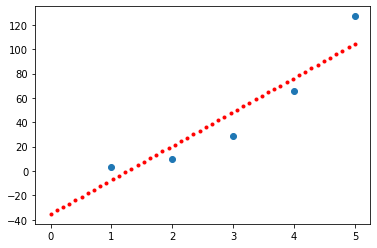

200th Pass
Cost=575.4563718199431 	 New A= [[ 29.94753736 -42.56646632]]


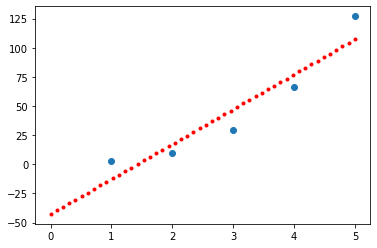

300th Pass
Cost=574.2415176140369 	 New A= [[ 30.31774926 -43.90304873]]


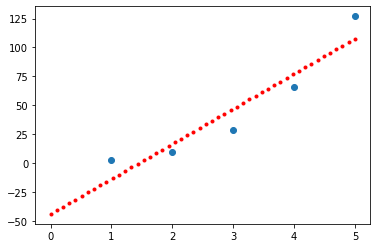

400th Pass
Cost=574.2013719762322 	 New A= [[ 30.38504808 -44.14601883]]


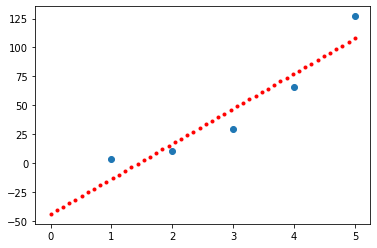

500th Pass
Cost=574.200045337836 	 New A= [[ 30.39728197 -44.19018705]]


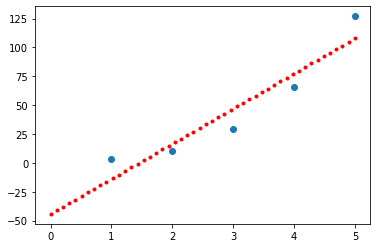

600th Pass
Cost=574.2000014982177 	 New A= [[ 30.3995059  -44.19821616]]


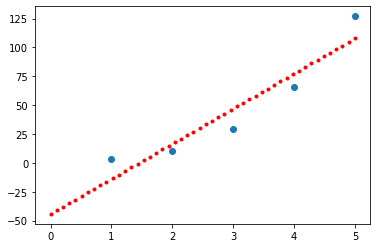

700th Pass
Cost=574.2000000495093 	 New A= [[ 30.39991018 -44.19967572]]


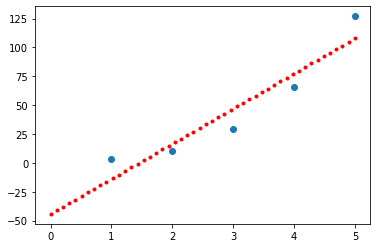

800th Pass
Cost=574.2000000016358 	 New A= [[ 30.39998367 -44.19994105]]


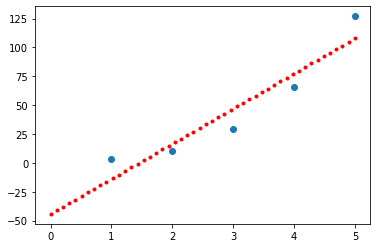

900th Pass
Cost=574.2000000000539 	 New A= [[ 30.39999703 -44.19998928]]


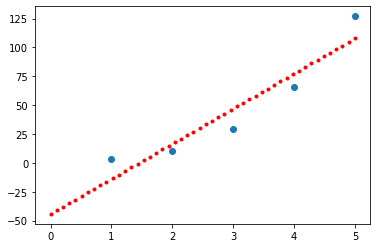

1000th Pass
Cost=574.2000000000019 	 New A= [[ 30.39999946 -44.19999805]]


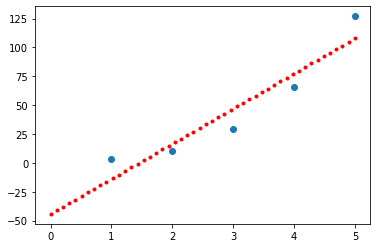

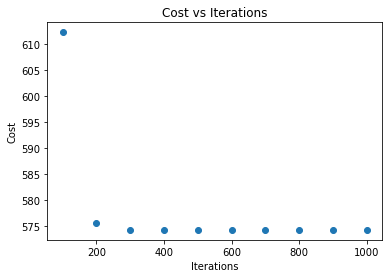

Min Cost: 574.2000000000016, Iteration: 996


In [165]:
# Linear
J_cost = {} # Cost vs Iteration
min_cost = float("inf")
min_i = 0

lin = Liner_Model(x)
for i in range(1,1001):
    # Fifth Pass
    
    lin.linear_regression(x)
    lin.update_cost(x,y)
    cost = lin.cost_function(y)
    if cost < min_cost:
        min_i = i
        min_cost = cost
    
    if (i%100 == 0):
        J_cost[i]= lin.cost_function(y)
        print("{}th Pass".format(i))
        print("Cost={} \t New A= {}".format(lin.cost, lin.A))
        lin.plot_graph(x,y)

plt.scatter(J_cost.keys(),J_cost.values())
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

print("Min Cost: {}, Iteration: {}".format(min_cost, min_i))

### Test the Non_Linear_Model
Use the code below to use the Non Linear Model to fit the data. Scatter plots and line plots are used to show how well the model fits the data. 

Also, **Cost vs Iterations** plot is also used to check how well the model fits the data as the no. of iteration increases.

800th Pass
Cost=40.88182525750283 	 New A= [[0.44327208 0.78210472 0.10307652 0.15265261 0.15738311]]


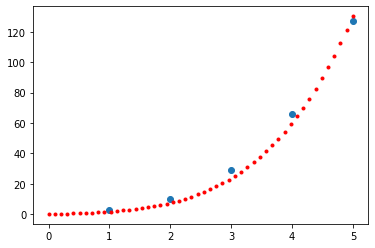

1600th Pass
Cost=24.155537252510765 	 New A= [[0.46426825 0.83346185 0.20114259 0.12963292 0.16577961]]


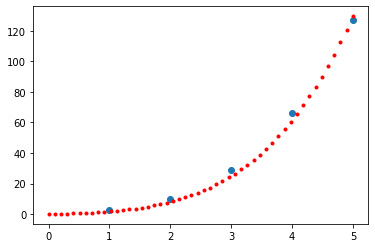

2400th Pass
Cost=14.339613321830214 	 New A= [[0.48036125 0.87276731 0.27627989 0.11199722 0.1722725 ]]


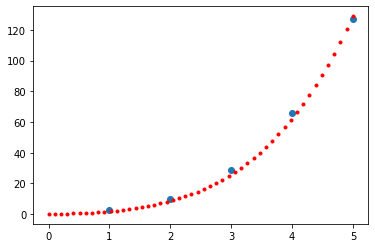

3200th Pass
Cost=8.579057944403635 	 New A= [[0.49269809 0.90284042 0.33385233 0.09848598 0.17730707]]


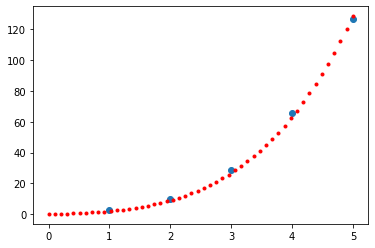

4000th Pass
Cost=5.1984081714473245 	 New A= [[0.50215743 0.92584095 0.37796898 0.08813435 0.18122443]]


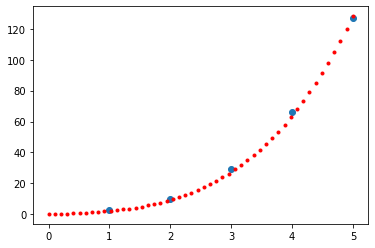

4800th Pass
Cost=3.2144133911223527 	 New A= [[0.5094124  0.94342342 0.41177766 0.08020317 0.18428591]]


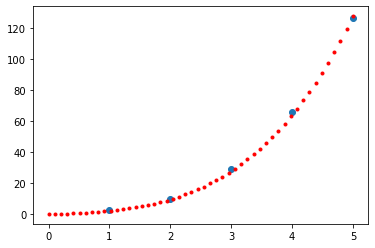

5600th Pass
Cost=2.0500499417242333 	 New A= [[0.51497864 0.9568553  0.43768981 0.0741262  0.1866917 ]]


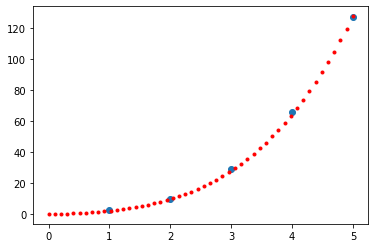

6400th Pass
Cost=1.3666897032174403 	 New A= [[0.51925119 0.96710753 0.45755273 0.06946968 0.18859514]]


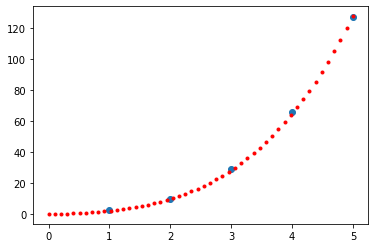

7200th Pass
Cost=0.9656077162721146 	 New A= [[0.52253264 0.97492395 0.47278157 0.06590131 0.19011372]]


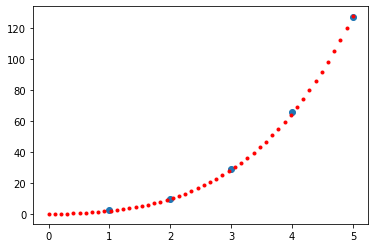

8000th Pass
Cost=0.730181623974965 	 New A= [[0.52505483 0.98087436 0.48446043 0.06316653 0.19133744]]


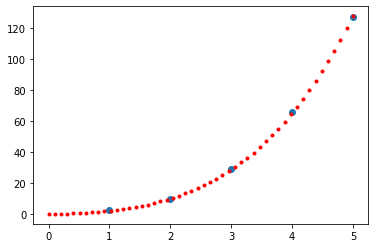

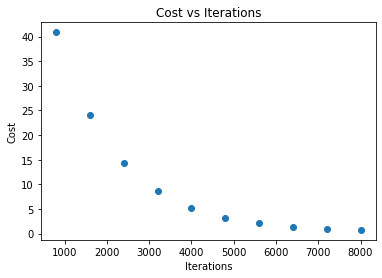

Min Cost: 0.730181623974965, Iteration: 8000


In [176]:
# Non_Linear
J_cost_non = {} # Cost vs Iteration
min_cost = float("inf")
min_i = 0

nonlin = Non_Liner_Model(x)
for i in range(1,8001):
    # Fifth Pass
    
    nonlin.non_linear_regression(x)
    nonlin.non_update_cost(x,y)
    cost = nonlin.non_cost_function(y)
    if cost < min_cost:
        min_i = i
        min_cost = cost
        
    if (i%800 == 0):
        J_cost_non[i]= nonlin.non_cost_function(y)
        print("{}th Pass".format(i))
        print("Cost={} \t New A= {}".format(nonlin.cost, nonlin.A))
        nonlin.non_plot_graph(x,y)
        
plt.scatter(J_cost_non.keys(),J_cost_non.values())
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

print("Min Cost: {}, Iteration: {}".format(min_cost, min_i))

### Insights
* As the no of iterations increases, the cost function decreases
* If the highest exponential used in the equation is 'n', then take learning rate to be 0.1^(n+1) to prevent overflow.
* Higher the values of 'A', higher its importance. `(A = [coeff of X, coeff of X2, coeff of X3,...])`